---

## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2020

---

* Estudiante: **Karol Liseth Hernández Morera**
* Carné: **B63367**
* Grupo: **1**


# `P2` - *La demanda energética de electricidad en Costa Rica*

> Esta actividad reúne las herramientas de programación y la definición, propiedades y funciones de la variable aleatoria continua para analizar los registros de la demanda energética del Sistema Eléctrico Nacional (SEN) durante el año 2019, para determinar un modelo probabilístico de mejor ajuste basado en pruebas de bondad.

---
* Elaboración de nota teórica y demostración: **Jeaustin Sirias Chacón**, como parte de IE0499 - Proyecto Eléctrico: *Estudio y simulación de aplicaciones de la teoría de probabilidad en la ingeniería eléctrica*.
* Revisión: **Fabián Abarca Calderón**


---
## 1. - Introducción: la variable aleatoria se aprende para no olvidarse

El concepto de la variable aleatoria es quizás uno de los conceptos más relevantes en la construcción de modelos probabilísticos, de modo que resulta imprescindible tener una noción clara.

La variable aleatoria podría tener un dominio que no es un conjunto numérico sino un espacio abstracto que contiene "sucesos", u ocurrencias de un experimento aleatorio. A este dominio se le llama *espacio muestral*. ¿Qué ocurre entonces con el ámbito? Aunque no es posible asociar un espacio abstracto directamente con valores numéricos, sí se puede relacionar numéricamente todos sus resultados posibles. Pero, ¿qué ocurre cuando este espacio muestral tiene infinitas probabilidades? Es acá cuando surge la **variable aleatoria continua**. Supóngase el siguiente contraejemplo: 

> Es usual observar tres tipos de medios de transporte en la ciudad: automóviles, motocicletas y bicicletas. El día de hoy me propuse contar 150 vehículos de forma aleatoria en la carretera principal de San Pedro de Montes de Oca mientras iba por el pan de la tarde para mi madre. Cuando volví a casa tabulé mis resultados y los representé de la siguiente manera según el tipo de vehículo:

| Dominio $S$           | Variable aleatoria $X$ |
|-----------------------|------------------------|
| <img src="https://cdn.onlinewebfonts.com/svg/img_553938.png" width="30"></img>                  |          $x_1$         |
| <img src="https://cdn.onlinewebfonts.com/svg/img_323762.png" width="20"></img> |          $x_2$         |
| <img src="https://cdn.onlinewebfonts.com/svg/img_22991.png" width="20"></img> |          $x_3$         |

> Luego de contabilizar la frecuencia de automóviles, bicicletas y motocicletas observadas durante el experimento me enteré de que el espacio muestral estaba limitado a solamente tres posibilidades, y aunque si mañana repitiese el ejercicio y la frecuencia de los automóviles vistos posiblemente variará, solo tendré la oportunidad de contar autos, motos y bicis...

El caso anterior representa un variable aleatoria **discreta**, puesto que puede obtenerse un número contable de ocurrencias $x_1$, $x_2$ y $x_3$, sin embargo, ¿qué ocurrirá si ahora desea repertirse el experimento anterior pero para conocer el peso en kilogramos de cada vehículo observado en la carretera?, ¿será posible que al menos dos vehículos compartan exactamente el mismo peso?, ¿estará el espacio muestral $S$ limitado a un número de magnitudes de peso en kg? Efectivamente, no. Si de forma ideal se colocara una váscula en cada uno de los vehículos podría apreciarse que existirán valores parecidos, pero no iguales; por ejemplo, dos autos que pesen 1340,5683 kg y 1340,7324 kg, respectivamente, entonces existe una cantidad no mensurable de probabiblidades en el espacio muestral $S$. En general se dirá que la probabilidad de encontrar un valor *puntual* (de precisión infinita) en una variable aleatoria continua es cero. Por ejemplo:

$$\displaystyle \frac{1500.\overline{0} \text{ kg}}{\text{Infinitos pesos entre 10 kg y 4000 kg}} \approx 0$$

---
## 2. - Pruebas de bondad de ajuste de los modelos

Hasta el momento en el curso hemos encontrado los parámetros de mejor ajuste entre un conjunto de datos (una "muestra") y un modelo probabilístico particular, quizá elegido *arbitrariamente* o por un desarrollado sentido de la intuición, del tipo: "hmm, esa distribución me parece exponencial". Sin embargo, está claro que algunos modelos hacen una mejor descripción de los datos que otros, y no siempre se puede encontrar "a puro ojo".

¿Cómo se evalúa entonces esta "bondad de ajuste" (*goodness of fit*) de cada modelo, de forma tal que se puedan comparar con una sola métrica todas las distribuciones analizadas y tomar una decisión? Existe alrededor de una docena de pruebas, pero aquí usaremos dos de las más comunes:

* [La prueba de Kolmogorov–Smirnov](https://es.wikipedia.org/wiki/Prueba_de_Kolmogorov-Smirnov), o *KS test*.
* [La prueba chi-cuadrado de Pearson](https://en.wikipedia.org/wiki/Chi-squared_test), o $\chi^2$. 

La explicación de cada una de estas pruebas se sale del objetivo de esta etapa del curso, por eso se mencionan aquí nada más.

#### Algunas distribuciones a utilizar

> ¿Qué puede esperarse de la demanda energética nacional si fuese una variable aleatoria?, ¿sería esta última, discreta o continua?, ¿podría aproximarse su distribución anual, mensual, diaria u horaria hacia un modelo de densidad probabilístico?

Al igual que en el ejemplo del peso en los vehículos, el espacio muestral de la demanda de energía es infinito para cualquier intervalo de valores $[a, b]$. Podría ocurrir que a las **00:00** de hoy la demanda registrada sea **909.8934 MW** mientras que mañana a la misma hora será **909.2232 MW** y al siguiente, **909.873666641 MW**; es decir, el experimento de medir la demanda en ese período tiene un sinnúmero de posibilidades, de modo que es una variable aleatoria *continua*.

Las funciones continuas de de probabilidad son muy variadas, las hay de todas formas. Algunas de ellas describen sistemas habituales y serán aquí utilizadas:

* Distribución normal
* Distribución de Rayleigh
* Distribución de Burr tipo XII
* Distribución gamma
* Distribución beta
* Distribución alfa

**Nota**: Algunas librerías de programación para encontrar el mejor ajuste hacen pruebas con *una gran cantidad* de distribuciones disponibles (más de 80), sin hacer ninguna presuposición. Nosotros, sin embargo, usaremos estas nada más, asumiendo que tienen "formas similares".

#### ¿Qué hace a una distribución mejor que otra al ajustar una población?

En términos relativos, depende en gran medida del sistema o proceso que se estudia. Como se expuso anteriormente hay una enorme familia de funciones de probabilidad. Habrá una de ellas que describa un conjunto de datos mejor que las demás. A esto se le denomina **bondad de ajuste** y se basa en evaluar discrepancias, residuos y/o frecuencias de dos o más distribuciones, generalmente con la intención de conocer si las muestras provienen de una misma distribución, si las muestras observadas siguien una distribución en particular o bien para evaluar qué tanto se ajusta un modelo probabilístico construido a partir de datos observados. 

En su mayoría se parte de una hipótesis nula $H_{O}$ que supone la siguiente premisa:

> Los datos observados y los predichos son iguales hasta que no se pruebe lo contrario.

Aparte de $\chi^2$ y *KS test* mencionados antes, se hace uso de índices de error como la [raíz del error cuadrático medio](https://es.wikipedia.org/wiki/Ra%C3%ADz_del_error_cuadr%C3%A1tico_medio) (RMSE) o el [error cuadrático medio](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio#:~:text=En%20el%20an%C3%A1lisis%20de%20regresi%C3%B3n,n%C3%BAmero%20de%20grados%20de%20libertad.) (SSE) para contrastar las muestras de una población. 

---
## 3. - Contexto: el *Sistema Eléctrico Nacional* (SEN) de Costa Rica

El [Centro Nacional de Control de Energía](https://apps.grupoice.com/CenceWeb/CenceMain.jsf) (CENCE) es el ente estatal encargado de registrar, manipular y analizar el sistema eléctrico nacional de Costa Rica en los ámbitos de generación, distribución y demanda de la energía eléctrica en el país. La matriz energética nacional está administrada por siete empresas distribuidoras, a saber:

* **Instituto Costarricense de Electricidad** (ICE)
* **Compañía Nacional de Fuerza y Luz** (CNFL)
* **Junta Administrativa del Servicio Eléctrico Municipal de Cartago** (JASEC)
* **Coopeguanacaste R.L.**
* **Coopelesca R.L.**
* **Coopesantos R.L.**
* **Empresa de Servicios Públicos de Heredia** (ESPH)


<img align='center' src='https://i.imgur.com/pPc9mIA.png' width ="650"/>

El servicio y el costo de las tarifas eléctricas ofrecidas por cada una de las empresas depende de la ubicación, el sector que lo solicita (residencial, industrial, comercial...) y las disposiciones de la [Autoridad Reguladora de los Servicios Públicos](https://aresep.go.cr/electricidad) (ARESEP). A nivel nacional se hallan establecidos tres períodos por concepto de actividad de consumo energético durante el día:

* **Período de punta**: Entre las **10:01** y las **12:30** horas, y entre las **17:31** y las **20:00** horas para un total de cinco horas diarias.
* **Período de valle**: Se comprende entre las **06:01** y las **10:00** horas, y entre las **12:31** y las **17:30** para total de nueve horas diarias.
* **Período nocturno**: Desde las **20:01** hasta las **06:00** del próximo día, para un total de 10 horas.

La demanda energética a nivel nacional es registrada en intervalos de 15 minutos durante todo el año. Existen temporadas o situaciones cuando la demanda es particularmente mayor por temas sociales y/o económicos. Por ejemplo, las fiestas de fin de año se caracterizan por celebrar la **Navidad** y el **Año Nuevo**: las casas, las vías públicas y los parques se iluminan con luces festivas al menos durante todo el mes de diciembre y poco antes. Asimismo, aumenta el uso de los hornos eléctricos en las familias para elaborar recetas propias de la fecha. 

Otro caso es la actual [emergencia nacional por el COVID-19](https://www.facebook.com/watch/?v=862104867616321), la cual ha repercutido considerablemente en todas las actividades habituales. 

### 3.1. - Aplicación: construyendo un modelo probabilístico  basado en demanda energética

Para la siguiente actividad, existe una base de datos que contiene la demanda energética nacional del año 2019 por hora, como se muestra a continuación:

<img align='center' src='https://i.imgur.com/2PwdGF0.png' width ="700"/>

Dicha "población" es una variable aleatoria continua. Es deseable hallar un modelo probabilístico que se ajuste lo mejor posible a lo observado de acuerdo con las pruebas de bondad de ajuste mencionadas anteriormente. Por ejemplo, se quiere analizar el comportamiendo de la demanda a las **18:00** horas durante todos los días en estudio. El módulo [`stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) de SciPy es útil para ejemplificar la presente aplicación de forma programada. La estrategia a implementar se elaborará bajo los siguientes pasos:


1. Acondicionar la base de datos para obtener las muestras a la hora de interés.
2. Ajustar varios modelos probabilísticos a evaluar sobre la muestra observada.
3. Determinar el mejor modelo probabilístico mediante las pruebas de bondad de ajuste **chi-cuadrado** ($\chi^2$), **Kolmogorov-Smirnov** (*KS test*) y el índice de error **RMSE**.
4. Determinar los cuatro primeros momentos centrales para el mejor modelo.
5. Visualizar los resultados obtenidos.

Para lograr los puntos anteriores se emplean entonces las siguientes librerías:

```python
import numpy as np              # para manipular datos
import matplotlib.pyplot as plt # para visualizar resultados
import pandas as pd             # para acondicionar la base de datos
from scipy import stats         # la música de la fiesta
from datetime import datetime   # funciones de conversión de fechas y horas
```

### 3.2. - Lectura y acondicionamiento de los datos

Es una buena práctica de programación desarrollar código empleando funciones, puesto que permite la generalización del proceso. Por ejemplo, para este caso es útil elaborar una función que no solamente acondicione la demanda a las **18:00**, sino a cualquier hora. Dicho de este modo entonces la hora debe ser un parámetro de ajuste variable en los argumentos.

#### 3.2.1. - Sobre el formato JSON

[JSON](https://es.wikipedia.org/wiki/JSON) (extensión `.json`) es un formato de texto de alto nivel, muy utilizado en el intercambio de información por su alta legibilidad y fácil manejo de la sintaxis. La librería de manipulación de datos, [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), ofrece un método especialmente adecuado para leer y manipular dicho formato. Para esta ocasión la base de datos importada se encuentra escrita en JSON para familiarizar su uso.

Los datos a analizar lucen de la siguiente manera:

```json
{
   "data":[
	    {
	      "fechaHora": "2019-01-01 00:00:00",
	      "MW": 958.05,
	      "MW_P": 1
	    },
	    {
	      "fechaHora": "2019-01-01 01:00:00",
	      "MW": 917.04,
	      "MW_P": 2
	    },
	    {
	      "fechaHora": "2019-01-01 02:00:00",
	      "MW": 856.19,
	      "MW_P": 3
	    },
	    {
	      "fechaHora": "2019-01-01 03:00:00",
	      "MW": 803.04,
	      "MW_P": 4
	    },
        (...miles de datos más...)
   ]
}
```

Y pueden interpretarse como una tabla donde `"fechaHora"`, `"MW"` y `"MW_P"` son los encabezados de cada columna, es decir:

| `"fechaHora"`         | `"MW"` | `"MW_P"` |
|-----------------------|--------|----------|
| "2019-01-01 00:00:00" | 958.05 | 1        |
| "2019-01-01 01:00:00" | 917.04 | 2        |
| "2019-01-01 02:00:00" | 856.19 | 3        |
| "2019-01-01 03:00:00" | 803.04 | 4        |
| ...                   | ...    | ...      |

##### Formato ISO de la fecha y hora

El formato `'YYYY-MM-DD hh:mm:ss'` es conocido como **formato ISO**, según el estándar ISO 8601.

### 3.3. - Funciones desarrolladas

Para la resolución de este proyecto se presentan dos funciones y una función auxiliar:

* `extraer_datos(archivo_json, hora)`: Importa la base de datos completa y devuelve los datos de potencia a la hora indicada en un *array* de valores.
* `evaluar_modelos(datos, distribuciones, divisiones, hora)`: Evalúa la bondad de ajuste de los datos con los modelos utilizados y grafica cada modelo.
* `horas_asignadas(digitos)`: Elige una hora A en periodo punta y una hora B de los otros periodos, con los dígitos del carné como *seed*.

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime

def extraer_datos(archivo_json, hora):
    '''Importa la base de datos completa y devuelve los
    datos de potencia a la hora indicada en un
    array de valores.
    '''
    
    # Cargar el "DataFrame"
    df = pd.read_json(archivo_json) 
    
    # Convertir en un array de NumPy
    datos = np.array(df)                

    # Crear vector con los valores demanda en una hora
    demanda = []

    # Extraer la demanda en la hora seleccionada
    for i in range(len(datos)):
        instante = datetime.fromisoformat(datos[i][0]['fechaHora'])
        if instante.hour == hora:
            demanda.append(datos[i][0]['MW'])

    return demanda

Observar que, en la función anterior, la variable `datos` tiene la siguiente forma:

```python
[[{'fechaHora': '2019-01-01 00:00:00', 'MW': 958.05, 'MW_P': 1}]
 [{'fechaHora': '2019-01-01 01:00:00', 'MW': 917.04, 'MW_P': 2}]
 [{'fechaHora': '2019-01-01 02:00:00', 'MW': 856.19, 'MW_P': 3}]
 ...
 [{'fechaHora': '2019-09-12 22:00:00', 'MW': 1184.73, 'MW_P': 1174.2}]
 [{'fechaHora': '2019-09-12 23:00:00', 'MW': 1044.81, 'MW_P': 1064.9}]
 [{'fechaHora': '2019-09-13 00:00:00', 'MW':  975.18, 'MW_P': 995}]]
```

que muestra un conjunto de diccionarios. Por tanto, la instrucción 

```python
datos[i][0]['fechaHora']
``` 

accesa el `i`-ésimo elemento, `[0]` representa el diccionario mismo (el único elemento que hay) y `['fechaHora']` devuelve el *valor* asociado con la *llave* `'fechaHora'`. Por ejemplo:

```python
>>> datos[1][0]['fechaHora']
'2019-01-01 01:00:00'
>>> datos[2][0]['MW']
856.19
```

### 3.4. - Parámetros de mejor ajuste

La siguiente función determina cuáles son los parámetros de mejor ajuste para ciertas distribuciones elegidas, utilizando `scipy.stats`.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

def evaluar_modelos(datos, distribuciones, divisiones, hora):
    '''Evalúa la bondad de ajuste de los datos con los 
    modelos utilizados y grafica cada modelo.
    '''
    
    # Distribución de frecuencia relativa
    ocurrencias_exp, limites = np.histogram(datos, bins=divisiones)
    
    # Eliminar los ceros de la frecuencia relativa
    for i in range(divisiones):
        if ocurrencias_exp[i] == 0:
            ocurrencias_exp[i] = 1
    
    # Encontrar el valor central de las divisiones
    bins_centrados = (limites + np.roll(limites, -1))[:-1] / 2.0 
    escala = len(datos) * (max(datos) - min(datos)) / len(bins_centrados)
    
    # Crear subfiguras para visualización (1 x 2)
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Información de la figura 1
    ax[0].set_title('Ajuste de las distribuciones')
    ax[0].set_ylabel('Frecuencia')
    ax[0].set_xlabel('Potencia [MW]')
    # Información de la figura 3
    ax[1].set_title('Distribución con mejor criterio de bondad de ajuste')
    ax[1].set_ylabel('Frecuencia')
    ax[1].set_xlabel('Potencia [MW]')
    
    # Visualizar datos
    ax[0].hist(datos, bins=divisiones, histtype='bar', color='palevioletred', rwidth=0.8)
    ax[1].hist(datos, bins=divisiones, histtype='bar', color='b')
    
    # Condiciones iniciales de las pruebas de ajuste
    rmse_min = np.inf  # el mayor índice de error
    p_max = 0          # el mejor p en chisqr test (0 es el "peor")
    kspmax = 0         # el mejor p en KStest (0 es el "peor")
    np.seterr(all='ignore') # ignorar errores con números de punto flotante

    # Evaluar las distribuciones, extraer parámetros y visualizar
    for distribucion in distribuciones:
        # Extraer de scipy.stats la distribución ("get attribute")
        dist = getattr(stats, distribucion) 
        
        # Parámetros de mejor ajuste para la distribución
        param = dist.fit(datos)
        
        # Evaluar la PDF en el valor central de las divisiones
        pdf = dist.pdf(bins_centrados, *param)
        
        # Convertir frecuencia relativa en ocurrencias (número absoluto)
        ocurrencias_teo = [int(round(i)) for i in escala*pdf]
        
        # Soporte para la gráfica
        d = np.arange(min(datos)*0.96, max(datos)*1.04, 1)
        
        # Graficar en ax[1]
        pdf_plot = dist.pdf(d, *param)
        ax[0].plot(d, escala*pdf_plot, lw=3.5, label='{}'.format(distribucion))

        # Prueba de bondad de ajuste por chi-cuadrado
        coef_chi, p = stats.chisquare(f_obs=ocurrencias_teo, f_exp=ocurrencias_exp)
        if p > p_max:  # si el p actual es mayor
            p_max = p  # designarlo como el máximo
            dist_chi = distribucion # elegir la distribución como la de mejor ajuste
            mod_chi = dist, param, pdf

        # Bondad de ajuste por RMSE (Root-Mean-Square Error)
        diferencia = (ocurrencias_teo - ocurrencias_exp)**2
        rmse = np.sqrt(np.mean(diferencia))
        if rmse < rmse_min:
            rmse_min = rmse
            dist_rmse = distribucion
            mod_rmse = dist, param, pdf

        # Bondad de ajuste por Kolgomorov - Smirnov
        D, ksp = stats.kstest(datos, distribucion, args=param)
        if ksp > kspmax:
            kspmax = ksp
            dist_ks = distribucion

    # Decidir el mejor modelo
    if dist_chi == dist_rmse or dist_chi == dist_ks:
        params = mod_chi[1]
        mejor_ajuste = dist_chi
        ax[1].hist(datos, bins=divisiones, color='cornflowerblue', label='Distribución observada')
        ax[1].bar(bins_centrados, mod_chi[2] * escala, width=6, color='r', label='Mejor ajuste: {}'.format(dist_chi))
        m, v, s, k = mod_chi[0].stats(*params, moments='mvsk') 

    elif dist_rmse == dist_ks:
        params = mod_rmse[1]
        mejor_ajuste = dist_rmse
        ax[1].hist(datos, bins = divisiones, color='cornflowerblue', label='Distribución observada')
        ax[1].bar(bins_centrados, mod_rmse[2] * escala, width=6, color='r', label='Mejor ajuste: {}'.format(dist_rmse))
        m, v, s, k = mod_rmse[0].stats(*params, moments='mvsk')

    # Imprimir resumen y resultados
    print('-------\nResumen\n-------')
    print('Cantidad de muestras:', len(datos), 'días a las', hora, 'horas')
    print('Máximo:', max(datos), 'MW')
    print('Mínimo:', min(datos), 'MW')
    print('Tipo: Demanda energética horaria')
    print('------\nAjuste\n------')
    print('Menor error RMS es:', dist_rmse)
    print('Mejor bondad de ajuste en la prueba de chi-cuadrado es:', dist_chi)
    print('Mejor bondad de ajuste en la prueba de Kolmogorov–Smirnov es:', dist_ks)
    print('Distribución elegida:', mejor_ajuste)
    print('--------\nMomentos\n--------')
    print('Media:', m, '\nVarianza:', v, '\nDesviación estándar:', np.sqrt(v), '\nCoeficiente simetría:', s, '\nKurtosis:', k)
    print('--------\nGráficas\n--------')
    
    ax[0].legend()
    ax[1].legend()
    plt.show()
    
    return params


### 3.5. - Evaluando los datos

Llegado a este punto, ahora solo se requiere llamar las dos funciones desarrolladas y elegir **la base de datos**, **las distribuciones** (de la galería de distribuciones continuas disponibles en el módulo [`stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)) y **la hora** a la que desea evaluarse.

-------
Resumen
-------
Cantidad de muestras: 255 días a las 18 horas
Máximo: 1602.64 MW
Mínimo: 1171.15 MW
Tipo: Demanda energética horaria
------
Ajuste
------
Menor error RMS es: beta
Mejor bondad de ajuste en la prueba de chi-cuadrado es: beta
Mejor bondad de ajuste en la prueba de Kolmogorov–Smirnov es: beta
Distribución elegida: beta
--------
Momentos
--------
Media: 1457.526794785272 
Varianza: 7931.395743639329 
Desviación estándar: 89.05838390426433 
Coeficiente simetría: -0.6460732802624384 
Kurtosis: -0.10503249832772582
--------
Gráficas
--------


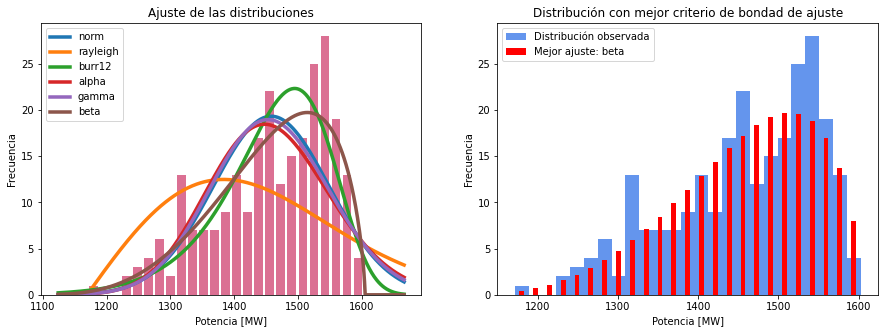

(4.365174092603407, 1.697438785557864, 1077.9835774131761, 527.1321483736039)

In [38]:
# Hora, en el intervalo [0, 23] (tipo int)
hora = 18

# Distribuciones a evaluar
distribuciones = ['norm', 'rayleigh', 'burr12', 'alpha', 'gamma', 'beta']

# Llamar a las funciones
demandas = extraer_datos('demanda_2019.json', hora)
evaluar_modelos(demandas, distribuciones, 25, hora)


---
## 4. - Asignaciones del proyecto

### 4.1. - Comparación de consumo de potencia para distintas horas del día

La curva de consumo de potencia diaria del SEN muestra cambios importantes durante el día, así que es esperable encontrar comportamientos distintos en la distribución de probabilidad para cada hora.

* (40%) Encuentre **la distribución de mejor ajuste y sus parámetros** para las dos horas asignadas.

Puede encontrar las horas asignadas con la función `horas_asignadas(digitos)`, donde `digitos` son los dígitos numéricos de su carné (por ejemplo: para B12345 `digitos = 12345`)

In [39]:
import random

def horas_asignadas(digitos):
    '''Elige una hora A en periodo punta
    y una hora B de los otros periodos,
    con los dígitos del carné como "seed"
    '''
    
    
    random.seed(digitos)
    punta = [11, 12, 18, 19, 20]
    valle = [7, 8, 9, 10, 13, 14, 15, 16, 17]
    nocturno = [21, 22, 23, 0, 1, 2, 3, 4, 5, 6]
    otro = valle + nocturno
    HA = punta[random.randrange(0, len(punta))]
    HB = otro[random.randrange(0, len(otro))]
    horas = 'Hora A = {}, hora B = {}'.format(HA, HB)
    return horas

In [76]:
# Carné B63367
horas_asignadas(63367)


'Hora A = 12, hora B = 9'

-------
Resumen
-------
Cantidad de muestras: 255 días a las 12 horas
Máximo: 1674.04 MW
Mínimo: 1184.56 MW
Tipo: Demanda energética horaria
------
Ajuste
------
Menor error RMS es: burr12
Mejor bondad de ajuste en la prueba de chi-cuadrado es: burr12
Mejor bondad de ajuste en la prueba de Kolmogorov–Smirnov es: burr12
Distribución elegida: burr12
--------
Momentos
--------
Media: 1547.979679574503 
Varianza: 5852.0670963210005 
Desviación estándar: 76.49880454177699 
Coeficiente simetría: -0.9021175430833628 
Kurtosis: 1.4247628245516895
--------
Gráficas
--------


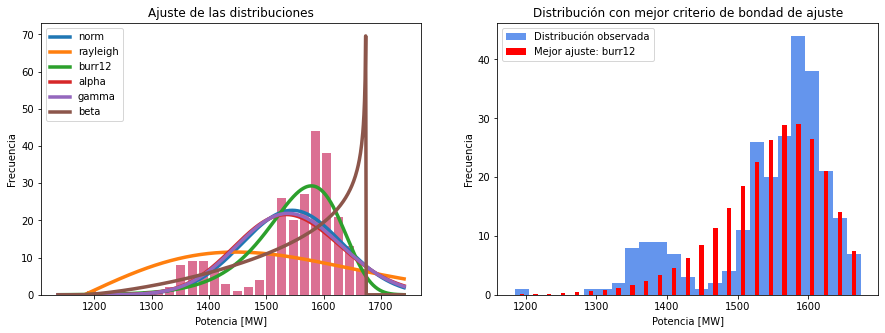

-------
Resumen
-------
Cantidad de muestras: 255 días a las 9 horas
Máximo: 1542.55 MW
Mínimo: 971.85 MW
Tipo: Demanda energética horaria
------
Ajuste
------
Menor error RMS es: burr12
Mejor bondad de ajuste en la prueba de chi-cuadrado es: beta
Mejor bondad de ajuste en la prueba de Kolmogorov–Smirnov es: beta
Distribución elegida: beta
--------
Momentos
--------
Media: 1416.3249015808105 
Varianza: 7314.366473196901 
Desviación estándar: 85.52406955469847 
Coeficiente simetría: -1.2748711151722232 
Kurtosis: 2.4379443375291623
--------
Gráficas
--------


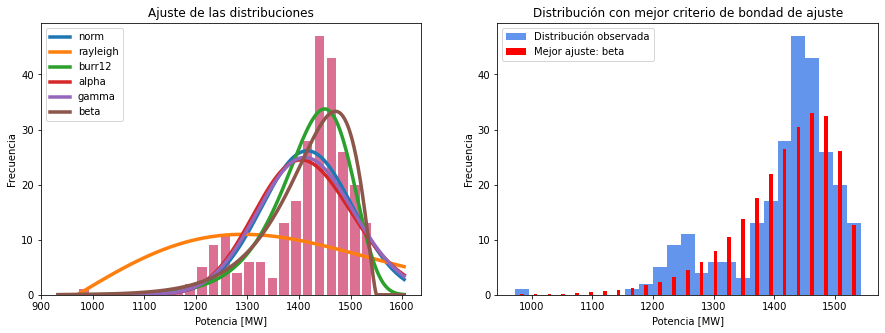

Parámetros para la hora A = (25.463794106739144, 53.7549107537114, -3.33963814952593, 1852.6603925702402)
Parámetros para la hora B = (41582295.569456406, 2.461089004373653, -2266902836.1279297, 2266904386.621786)


In [77]:
# 4.1. - Comparación de consumo de potencia

# Hora A, en el intervalo [0, 23] (tipo int)

hora = 12 # Hora correspondiente caso A

# Distribuciones a evaluar
distribuciones = ['norm', 'rayleigh', 'burr12', 'alpha', 'gamma', 'beta']

# Llamar a las funciones
demandas = extraer_datos('demanda_2019.json', hora)

#evaluar_modelos(demandas, distribuciones, 25, hora) y además se determina la variable parámetro1
parametro1= evaluar_modelos(demandas, distribuciones, 25, hora) 

#----------------------------------------------------------------------------------------------------------

# Hora B, en el intervalo [0, 23] (tipo int)

hora2 = 9 # Hora correspondiente caso B

# Distribuciones a evaluar
distribuciones = ['norm', 'rayleigh', 'burr12', 'alpha', 'gamma', 'beta']

# Llamar a las funciones
demandas2 = extraer_datos('demanda_2019.json', hora2)

#evaluar_modelos(demandas2, distribuciones, 25, hora2) y además se determina la variable parámetro2
parametro2= evaluar_modelos(demandas2, distribuciones, 25, hora2)

# Imprimir lo valores de los parámetros 

print('Parámetros para la hora A =',parametro1)
print('Parámetros para la hora B =',parametro2)



### 4.2. - Análisis parte 1

Resuma estos hallazgos en una tabla con los cuatro momentos más importantes (y la desviación estándar) para cada modelo de cada hora analizada.

* (30%) Complete la tabla de resultados de los momentos, haciendo los cálculos respectivos con Python o con sus modelos (mostrando las ecuaciones respectivas).

In [75]:
# 4.2. - Obtención de los momentos de los modelos

# Se importan las funciones que se necesitan de la librería Scipy.stats
from scipy.stats import burr12, beta, skew, kurtosis

# Se determinan las variables para los valores de loc y scale de la hora A
loc1=  parametro1[2]
scale1= parametro1[3]

# Se determinan las variables para los valores de loc y scale de la hora B
loc2= parametro2[2]
scale2= parametro2[3]


# Obtener los parámetros conforme la función de cada distribución pertinente : 
va = burr12(parametro1[0], parametro1[1], loc1,  scale1) # Para la hora A burr12
va2 = beta(parametro2[0], parametro2[1], loc2, scale2)   # Para la hora B beta


# Datos aleatorios, mediante el metódo rvs
datos = va.rvs(500)    # Para la hora A 
datos2 = va2.rvs(500)  # Para la hora B 

# Media de los datos
media_d = np.mean(datos)
media_d2 = np.mean(datos2)

# Varianza de los datos
varianza_d = np.var(datos)
varianza_d2 = np.var(datos2)

# Inclinación de los datos
inclinacion_d = skew(datos)
inclinacion_d2 = skew(datos2)


# Varianza de los datos
desviacion_d = np.std(datos)
desviacion_d2 = np.std(datos2)

# Kurtosis de los datos
curtosis_d = kurtosis(datos)
curtosis_d2 = kurtosis(datos2)


# Imprimir resumen de datos distribucion A
print('--------\nMomentos para la hora A\n--------')
print('Media A (datos): {:0.4f}'.format(media_d))
print('Varianza A (datos): {:0.4f}'.format(varianza_d))
print('Desviación estándar A (datos): {:0.4f}'.format(desviacion_d))
print('Inclinación A (datos): {:0.4f}'.format(inclinacion_d))
print('Kurtosis A (datos): {:0.4f}'.format(curtosis_d))


# Imprimir resumen de datos distribucion B
print('--------\nMomentos para la hora B\n--------')
print('Media B (datos): {:0.4f}'.format(media_d2))
print('Varianza B (datos): {:0.4f}'.format(varianza_d2))
print('Desviación estándar B (datos): {:0.4f}'.format(desviacion_d2))
print('Inclinación B(datos): {:0.4f}'.format(inclinacion_d2))
print('Kurtosis B (datos): {:0.4f}'.format(curtosis_d2))


--------
Momentos para la hora A
--------
Media A (datos): 1549.7045
Varianza A (datos): 5836.6514
Desviación estándar A (datos): 76.3980
Inclinación A (datos): -0.9210
Kurtosis A (datos): 1.6100
--------
Momentos para la hora B
--------
Media B (datos): 1413.7617
Varianza B (datos): 7984.2398
Desviación estándar B (datos): 89.3546
Inclinación B(datos): -1.3438
Kurtosis B (datos): 2.9917


#### Expresiones analíticas parametrizadas de los momentos (beta)

<!-- Ejemplo para la distribución beta -->

| Momento     | Expresión analítica parametrizada de la distribución |
|-------------|------------------------------------------------------|
| Media       | $\displaystyle E[X] = \frac{\alpha}{\alpha+\beta}\!$ |
| Varianza    | $\displaystyle \operatorname{var}[X] = \frac{\alpha\beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}\!$ |
| Inclinación | $\displaystyle S_X = \frac{2\,(\beta-\alpha)\sqrt{\alpha+\beta+1}}{(\alpha+\beta+2)\sqrt{\alpha\beta}}$ |
| Kurtosis    | $\displaystyle \kappa_X = \frac{6[(\alpha - \beta)^2 (\alpha +\beta + 1) - \alpha \beta (\alpha + \beta + 2)]}{\alpha \beta (\alpha + \beta + 2) (\alpha + \beta + 3)}$ |


#### Expresiones analíticas parametrizadas de los momentos (burr)
<!-- Ejemplo para la distribución burr -->

| Momento     | Expresión analítica parametrizada de la distribución |
|-------------|------------------------------------------------------|
| Media       | $\displaystyle \mu_1 = \kappa\beta(\kappa-\frac{1}{c},1+\frac{1}{c}), \beta = función Beta   $ |
| Varianza    | $\displaystyle \operatorname{var}[X] = -(\mu_1)^2 + \mu_2$  |
| Inclinación | $\displaystyle S_X = {\frac {2\mu _{1}^{3}-3\mu _{1}\mu _{2}+\mu _{3}}{\left(-\mu _{1}^{2}+\mu _{2}\right)^{3/2}}}$ |
| Kurtosis    | $\displaystyle \kappa_X =  {\frac {-3\mu _{1}^{4}+6\mu _{1}^{2}\mu _{2}-4\mu _{1}\mu _{3}+\mu _{4}}{\left(-\mu _{1}^{2}+\mu _{2}\right)^{2}}}-3$ |




#### Valores obtenidos para el modelo y los datos de la muestra

Análisis para las horas A = 12:00 p.m y B = 09:00 a.m

| Momento         | Fuente   | A = 12:00 pm | B = 9:00 am | 
|-----------------|----------|-------------|-------------|
| **Media**       | *Modelo* | 1547.9796   | 1416.3249   |
| **Media**       | *Datos*  | 1549.7045   | 1413.7617   |
| **Varianza**    | *Modelo* | 5852.0670   | 7314.3664   |
| **Varianza**    | *Datos*  | 5836.6514   | 7984.2398   |
| **Desviación**  | *Modelo* | 76.4988     | 85.5240     |
| **Desviación**  | *Datos*  | 76.3980     | 89.3546     |
| **Inclinación** | *Modelo* | -0.9021     | -1.2748     |
| **Inclinación** | *Datos*  | -0.9210     | -1.3438     |
| **Kurtosis**    | *Modelo* | 1.4247      | 2.4379      |
| **Kurtosis**    | *Datos*  | 1.6100      | 2.9917      |

**Nota**: utilizar cuatro decimales.

### 4.3. - Análisis de los datos obtenidos

De la comparación de las horas estudiadas, 

* (30%) Explique las posibles razones de las diferencias observadas, desde una interpretación estadística.

<!-- Inicie aquí la explicación. Puede incluir imágenes, tablas, fragmentos de código o lo que considere necesario. -->

### Análisis

<!-- Utilice las mejores prácticas de edición de formato de Markdown: https://www.markdownguide.org/basic-syntax/ -->

<!--Aquí va el análisis y las ecuaciones y las tablas y las figuras...-->

<h3> - Gráficas para el análisis de la hora A: 12:00 p.m</h3>

<img align='center' src='https://i.imgur.com/HY0IvEE.png' width ="900"/>

Conforme el gráfico de distribuciones de ajuste, es evidente que la que presenta un comportamiento más similar a los resultados de los datos, es la distribución <strong>burr12</strong>, según la prueba de bondad de ajuste  de cada modelo también concuerda con el anteriormente mencionado, siendo este el elegido para encontrar los momentos correspondientes proporcionados por la hora A.

<h3> - Gráficas para el análisis de la hora B: 09:00 a.m</h3>

<img align='center' src='https://imgur.com/NnE5l4s.png' width ="900"/>

De acuerdo con el gráfico de distribuciones de ajuste, la distribución beta y burr12, son las que están más ajustadas de manera observable, donde la diferencia mínima entre estas es prácticamente en las curvas, se estudió acorde a tres pruebas probabilísticas de ajuste, primeramente con base el menor error cuadrático medio, se obtiene que cumple burr12, pero con el método de prueba de bondad de ajuste chi-cuadrado y Kolmogorov-Smirnov, la distribución elegida como más eficaz para el estudio de la muestra de la hora B, es la <strong>beta</strong>, dado los resultados anteriores, la mejor opción de distribución es beta según la muestra tomada a las 09:00 a.m. 

###  1- Análisis de la media
   
 

##### 1.1 Expresiones analíticas para obtener la media ( Beta y Burr )

<img align='center' src='https://i.imgur.com/Ann2qP9.png' width ="400"/>
 

##### 1.2 Valores de la media obtenidos para el modelo y los datos 

| Momento         | Fuente   | A = 12:00 pm | B = 9:00 am | 
|-----------------|----------|-------------|-------------|
| **Media**       | *Modelo* | 1547.9796   | 1416.3249   |
| **Media**       | *Datos*  | 1549.7045   | 1413.7617   |


Primeramente, la **media** es el promedio del conjunto de datos que se analizan. Entonces tenemos que el valor mínimo de la hora A es de 1184.56 MW y máxima de 1674.04 MW, puesto que la media es el promedio, el valor esperado esta en ese intervalo, donde tanto el modelo como los datos, muestran cifras adecuadas, expuestas en la tabla anterior. De acuerdo los valores entre el modelo y los datos, la diferencia tiene un porcentaje de error de 0.11% , es decir despreciable. 

Por otra parte, para la media de la hora B, el valor mínimo es de 971.85 MW y máxima de 1542.55 MW, y las cifras correspondientes al modelo es de 1416.3249 MW mientras que para los datos es de 1413.7617 MW, perteneciendo al intervalo limitado por la demanda energética, con un porcentaje de error de 0.18%, entre el rango de tolerancia, es aceptado.  


### 2- Análisis de la varianza y desviación estándar

##### 2.1 Expresiones analíticas para obtener  varianza ( Beta y Burr )

<img align='center' src='https://i.imgur.com/AC3e3aB.png' width ="380"/>

##### 2.2 Valores de varianza y desviación estándar obtenidos para el modelo y los datos 

| Momento         | Fuente   | A = 12:00 pm | B = 9:00 am | 
|-----------------|----------|-------------|-------------|
| **Varianza**    | *Modelo* | 5852.0670   | 7314.3664   |
| **Varianza**    | *Datos*  | 5836.6514   | 7984.2398   |
| **Desviación**  | *Modelo* | 76.4988     | 85.5240     |
| **Desviación**  | *Datos*  | 76.3980     | 89.3546     |

La **varianza** es la medida de dispersión definida como  $\sigma _{X}^{2}$ = $E[X^{2}]- E[X]^{2}$ , mientras que la **desviación estándar** está dado por $\sigma _{X}$ = $ \sqrt {E[X^{2}]- (E[X])^{2}} $ , como se observa, su relación es que la desviación es la raíz cuadrada de la varianza, esta muestra como tienden a estar agrupados las variables de análisis cerca de su media, es por esto que dichos momentos tienen relación con la media " $E[X]$  ".

Como se comprobó en la sección 1.2, los valores de la media son apropiados, puesto que el modelo de la hora A, tiene una varianza de 5852.0670 entonces la desviación estándar se obtiene aplicándole la raíz cuadrada, obteniendo el valor de 76.4988, concordando con el valor obtenido en la tabla, para los demás datos también se cumple, tanto para la hora A y la hora B. Por otra parte, de acuerdo con los valores de desviación estándar, la hora A es menor que la hora B, es decir, que la mayoría de los datos de la gráfica están más cerca de la media de esta, y para el caso B, los valores están más alejados.  


Se puede apreciar que la afirmación anterior es correcta, dado que la diferencia del intervalo de la hora A es de **489,48 MW**  [1184.56 MW, 1674.04 MW], y la de la hora B es de **570,7 MW**, la cual cuenta con un intervalo de [971.85 MW, 1542.55 MW], donde se evidencia que los datos se extienden sobre un rango de valores más amplio a las 09:00 a.m., indicando una **desviación estándar más alta**.





### 3- Análisis de la inclinación

##### 3.1 Expresiones analíticas para obtener  inclinación ( Beta y Burr )

<img align='center' src='https://i.imgur.com/inE12NO.png' width ="380"/>

##### 3.2 Valores de  inclinación obtenidos para el modelo y los datos 

| Momento         | Fuente   | A = 12:00 pm | B = 9:00 am | 
|-----------------|----------|-------------|-------------|
| **Inclinación** | *Modelo* | -0.9021     | -1.2748     |
| **Inclinación** | *Datos*  | -0.9210     | -1.3438     |


La **inclinación o coeficiente simetría**, indica la simetría de la distribución tomando como referencia  la media, observando las gráficas, se podría considerar que la figura correspondiente a la hora A es más simétrica, según los datos expuestos en la tabla de la sección 3.2, tiene una mayor proporción el caso A, acorde que el valor de inclinación es menor, correspondiendo tanto analíticamente como visualmente los resultados. En tal caso, respecto la hora B, se presenta una mayor irregularidad en relación con la distribución de los datos a partir de la media. 
La diferencia puede darse porque en los dos casos la distribución es distinta, beta y burr12 tiene comportamientos establecidos, y asimismo, la asimetría que poseen. Sin embargo, las horas A y B concuerdan en que presentan **asimetría negativa**.


### 4- Análisis de la kurtosis

##### 4.1 Expresiones analíticas para obtener la kurtosis ( Beta y Burr ) 

<img align='center' src='https://i.imgur.com/vk7qFkZ.png' width ="380"/>

##### 4.2 Valores de kurtosis obtenidos para el modelo y los datos 

| Momento         | Fuente   | A = 12:00 pm | B = 9:00 am |
|-----------------|----------|-------------|-------------|
| **Kurtosis**    | *Modelo* | 1.4247      | 2.4379      |
| **Kurtosis**    | *Datos*  | 1.6100      | 2.9917      |

La **kurtosis** es la medida que señala la forma que mide cuán escarpada o achatada es la curva de la distribución, entonces entre más achatada es, posee una kurtosis con un valor menor, y si es escarpada, indica una kurtosis más grande.
Conforme lo mencionado anteriormente, según los datos obtenidos, el modelo de la **hora A es la más achatada**, pero con valores aleatorios aumenta, siendo más escarpada. Igualmente, para el caso B el comportamiento es similar entre datos y el modelo, pero dado los dos casos, **es más escarpada para las 09:00 a.m**. De manera visual, se puede determinar los resultados expuestos, ya que la gráfica de la hora A, no sobrepasa la frecuencia de 30, mientras que la hora B, sí, mostrando una kurtosis más alta.



---

### Universidad de Costa Rica
#### Facultad de Ingeniería
##### Escuela de Ingeniería Eléctrica

---